>### 特征工程

**数据（Data）和特征（Feature）**

行为观测样本，列为特征变量

![ddddddddd](fjlfjsfjfjkfjfjdjf)

**特征工程（Feature Engineering）**

其本质是一项工程活动，它的目的是最大限度地从原始数据中提取特征以供算法和模型使用。
数据&特征决定了机器学习的上限，而模型和算法只是逼进这个上限而已

**特征工程重要性**

* 特征越好，灵活性越强
* 特征越好，模型越简单
* 特征越好，性能越出色

**特征工程包括**

* 数据处理
* 特征选择
* 维度压缩

>### 数据处理

**量纲不一**：量纲就是单位，特征的单位不一致，不能放在一起比较。（票房数据与评分数据，需要进行0-1标准化）

0-1标准化-----对原始数据进行线性变换，将特征值映射成区间为[0,1]的标准值中

        标准化值=（原数据-最小值）/（最大值-最小值）

Z标准化-----基于特征值的均值（mean）和标准差（standard deviation）进行数据的标准化。标准化后的变量值围绕0上下波动，大于0说明高于平均水平，小于0说明低于平均水平
        
        标准化数据=（原数据-均值）/标准差
        
Normalizer归一化-----将每个样本缩放的单位范数（每个样本的范数为1）

![eeeeeeee](jffdkjsfkdfjsfk)

In [1]:
#0-1标准化
import pandas 

data =pandas.read_csv('D:\\PDM\\6.1\\data1.csv')

from sklearn.preprocessing import MinMaxScaler

In [15]:
import numpy as np
np.array(data['豆瓣评分'])

array([ 6.6,  7. ,  4.2,  7.7,  9.1])

In [21]:
scaler = MinMaxScaler()
data['标准化累计票房'] = scaler.fit_transform(data[['累计票房']])
data['标准化豆瓣评分'] = scaler.fit_transform(data[['豆瓣评分']])
data

,电影名称,累计票房,豆瓣评分,标准化累计票房,标准化豆瓣评分
0,变形金刚4：绝迹重生,4742.92,6.6,1.000000,0.489796
1,心花路放,3398.00,7.0,0.496835,0.571429
2,西游记之大闹天宫,2491.90,4.2,0.157842,0.000000
3,智取威虎山3D,2149.00,7.7,0.029556,0.714286
4,星际穿越,2070.00,9.1,0.000000,1.000000


In [22]:
#Z-Score标准化
from sklearn.preprocessing import scale

data['标准化累计票房'] = scale(data['累计票房'])
data['标准化豆瓣评分'] = scale(data['豆瓣评分'])
data

,电影名称,累计票房,豆瓣评分,标准化累计票房,标准化豆瓣评分
0,变形金刚4：绝迹重生,4742.92,6.6,1.765675,-0.199471
1,心花路放,3398.00,7.0,0.425976,0.049868
2,西游记之大闹天宫,2491.90,4.2,-0.476607,-1.695502
3,智取威虎山3D,2149.00,7.7,-0.818175,0.486210
4,星际穿越,2070.00,9.1,-0.896869,1.358895


In [27]:
#Normalizer归一化
from sklearn.preprocessing import Normalizer

scaler = Normalizer()
data['归一化累计票房'] = scaler.fit_transform(data[['累计票房']])
data['归一化豆瓣评分'] = scaler.fit_transform(data[['豆瓣评分']])
data

,电影名称,累计票房,豆瓣评分,标准化累计票房,标准化豆瓣评分,归一化累计票房,归一化豆瓣评分
0,变形金刚4：绝迹重生,4742.92,6.6,1.765675,-0.199471,1.0,1.0
1,心花路放,3398.00,7.0,0.425976,0.049868,1.0,1.0
2,西游记之大闹天宫,2491.90,4.2,-0.476607,-1.695502,1.0,1.0
3,智取威虎山3D,2149.00,7.7,-0.818175,0.486210,1.0,1.0
4,星际穿越,2070.00,9.1,-0.896869,1.358895,1.0,1.0


**虚拟变量**：也叫哑变量和离散特征编码，可用来表示分类变量、非数量因素可能产生的影响

In [28]:
data =pandas.read_csv('D:\\PDM\\6.1\\data2.csv')
data

,症状,职业,疾病
0,打喷嚏,护士,感冒
1,打喷嚏,农夫,过敏
2,头痛,建筑工人,脑震荡
3,头痛,建筑工人,感冒
4,打喷嚏,教师,感冒
5,头痛,教师,脑震荡


In [29]:
data['症状'] = data['症状'].astype('category')
dummiesData = pandas.get_dummies(
    data,
    columns=['症状'],
    prefix=['症状'],
    prefix_sep="_"
)
dummiesData

,职业,疾病,症状_头痛,症状_打喷嚏
0,护士,感冒,0,1
1,农夫,过敏,0,1
2,建筑工人,脑震荡,1,0
3,建筑工人,感冒,1,0
4,教师,感冒,0,1
5,教师,脑震荡,1,0


In [30]:
newData = pandas.read_csv('D:\\PDM\\6.1\\data2New.csv')
newData

,症状,职业,疾病
0,打喷嚏,农夫,过敏


In [31]:
dummiesNewData = pandas.get_dummies(
    newData,
    columns=['症状'],
    prefix=['症状'],
    prefix_sep="_"
)
dummiesNewData

,职业,疾病,症状_打喷嚏
0,农夫,过敏,1


In [32]:
newData['症状'] = newData['症状'].astype(
    'category',
    categories=data['症状'].cat.categories
)
newData

,症状,职业,疾病
0,打喷嚏,农夫,过敏


In [33]:
dummiesNewData = pandas.get_dummies(
    newData,
    columns=['症状'],
    prefix=['症状'],
    prefix_sep="_"
)
dummiesNewData

,职业,疾病,症状_头痛,症状_打喷嚏
0,农夫,过敏,0,1


**缺失值**

缺失值产生原因

* 有些信息暂时无法获取
* 有些信息被遗漏或者错误的处理了

缺失值处理方法

* 数据补齐
* 删除确实行
* 不处理

In [34]:
data = pandas.read_csv('D:\\PDM\\6.1\\data3.csv')
data

,电影名称,累计票房,豆瓣评分
0,变形金刚4：绝迹重生,4742.92,6.6
1,心花路放,3398.00,7.0
2,西游记之大闹天宫,2491.90,NaN
3,智取威虎山3D,NaN,7.7
4,星际穿越,2070.00,9.1


In [37]:
from sklearn.preprocessing import Imputer

imputer = Imputer(strategy='mean')
imputer.fit_transform(data[['累计票房']])

array([[ 4742.92 ],
       [ 3398.   ],
       [ 2491.9  ],
       [ 3175.705],
       [ 2070.   ]])

>### 特征选择


**如何选择特征**

* 是否发散
* 是否相关

**方差选择法**：先计算各个特征的方差，根据阈值，选择方差大于阈值的特征。

In [39]:
import pandas 

data = pandas.read_csv('D:\\PDM\\6.2\\data1.csv')

from sklearn.feature_selection import VarianceThreshold
#方差过滤，threshold最小方差的阈值
varianceThreshold = VarianceThreshold(threshold=1)
#特征值过滤
varianceThreshold.fit_transform(data[['累计票房','豆瓣评分']])


array([[  4.74292000e+03,   6.60000000e+00],
       [  3.39800000e+03,   7.00000000e+00],
       [  2.49190000e+03,   4.20000000e+00],
       [  2.14900000e+03,   7.70000000e+00],
       [  2.07000000e+03,   9.10000000e+00]])

In [42]:
#方差都大于1，所以都被选择出来了
data[['累计票房','豆瓣评分']].std()


累计票房    1122.391339
豆瓣评分       1.793600
dtype: float64

In [43]:
varianceThreshold = VarianceThreshold(threshold=3)
varianceThreshold.fit_transform(data[['累计票房','豆瓣评分']])


array([[ 4742.92],
       [ 3398.  ],
       [ 2491.9 ],
       [ 2149.  ],
       [ 2070.  ]])

In [44]:
#查看哪列被选择
varianceThreshold.get_support()


array([ True, False], dtype=bool)

**相关系数法**：先计算各个特征对目标值的相关系数，选择更加相关的特征。

In [50]:
data = pandas.read_csv('D:\\PDM\\6.2\\data2.csv')

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

selectKBest = SelectKBest(
    f_regression,k=2
)
feature = data[['月份','季度','广告费用','客流量']]

feature[:10]

,月份,季度,广告费用,客流量
0,201301,1,29.40,13.76
1,201302,1,25.00,9.70
2,201303,1,19.50,6.80
3,201304,2,15.70,6.20
4,201305,2,9.00,5.00
5,201306,2,15.50,7.79
6,201307,3,10.60,5.50
7,201308,3,15.88,6.80
8,201309,3,17.00,6.90
9,201310,4,21.50,9.60


In [51]:
bestFeature = selectKBest.fit_transform(
    feature,
    data['销售额']
)
feature.columns[selectKBest.get_support()]

Index(['广告费用', '客流量'], dtype='object')

**递归特征消除法**：使用一个基模型来进行多轮训练，经过多轮训练后，保留指定的特征数。

In [53]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

rfe = RFE(
    estimator=LinearRegression(),
    #要选择的特征数
    n_features_to_select=2
)

sFeature = rfe.fit_transform(
    feature,
    data['销售额']
)
rfe.get_support()

array([False, False,  True,  True], dtype=bool)

**模型选择法**：它是一种我们把建好的模型对象传入选择器，然后它会根据这个已经建好的模型，自动帮我们选择最好的特征值

In [55]:
from sklearn.feature_selection import SelectFromModel

IrModel = LinearRegression()
selectFromModel = SelectFromModel(IrModel)
#传入自变量与因变量
selectFromModel.fit_transform(
    feature,
    data['销售额']
)


array([[ 13.76],
       [  9.7 ],
       [  6.8 ],
       [  6.2 ],
       [  5.  ],
       [  7.79],
       [  5.5 ],
       [  6.8 ],
       [  6.9 ],
       [  9.6 ],
       [ 10.6 ],
       [ 13.67],
       [ 13.7 ],
       [ 13.4 ],
       [  8.5 ],
       [  7.7 ],
       [  6.4 ],
       [  9.5 ],
       [  6.4 ],
       [  6.9 ],
       [  8.8 ],
       [  9.4 ],
       [  9.6 ],
       [ 13.  ],
       [ 12.66],
       [  9.6 ],
       [  8.7 ],
       [  7.5 ],
       [  8.6 ],
       [ 10.5 ],
       [  8.  ],
       [  7.7 ],
       [  7.  ],
       [  8.4 ],
       [  9.7 ],
       [ 11.11]])

In [56]:
feature.columns[selectFromModel.get_support()]

Index(['客流量'], dtype='object')

>### 维度压缩

**主成分分析（Principal Components Analysis）**：在减少数据集的维度的同时，保持对方差贡献最大的特征。

**PCA API**

    pca_3 = PCA(n_components=3)

    data_pca = pca_3.fit_transform(data)

In [57]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

iris = datasets.load_iris()
data = iris.data
target = iris.target


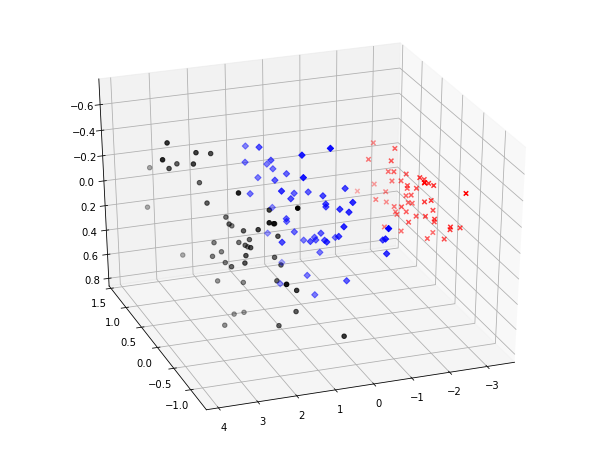

In [60]:
colors = {
    0: 'r',
    1: 'b',
    2: 'k'
}

markers = {
    0: 'x',
    1: 'D',
    2: 'o'
}

#弹出图形
#%matplotlib qt
%matplotlib inline

pca_3 = PCA(n_components=3)
data_pca_3 = pca_3.fit_transform(data)

#三维数据
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)

data_pca_gb = pandas.DataFrame(
    data_pca_3
).groupby(target)

for g in data_pca_gb.groups:
    ax.scatter(
        data_pca_gb.get_group(g)[0], 
        data_pca_gb.get_group(g)[1], 
        data_pca_gb.get_group(g)[2], 
        c=colors[g], 
        marker=markers[g],
        cmap=plt.cm.Paired
    )


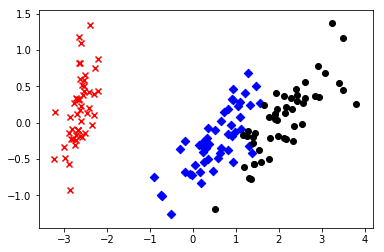

In [63]:
#二维数据
pca_2 = PCA(n_components=2)
data_pca_2 = pca_2.fit_transform(data)

data_pca_gb = pandas.DataFrame(data_pca_2).groupby(target)

import matplotlib.pyplot as plt;

for g in data_pca_gb.groups:
    plt.scatter(
        data_pca_gb.get_group(g)[0], 
        data_pca_gb.get_group(g)[1], 
        c=colors[g], 
        marker=markers[g],
    )